Most of the code below is referred from this Git Repo found in the course module

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

#### Problem
##### The objective is to model the demand for shared bikes with the available independent variables and be able to interpret the results

### Reading & Visualizing Data

In [2]:
data = pd.read_csv('day.csv')

##### Column Descriptions
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### In the given business problem, our target variable is cnt and the rest are the independent variables

In [4]:
#We have a total of 730 rows and 16 columns
data.shape

(730, 16)

In [5]:
#To get a feel of column values
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### We see that there are no columns with missing values and can skip the step of "Missing Value Treatment"
We see that few variables are unecessary,
1. instant - serves more like a row index and does not add value in model building
2. dteday - First of all, this is the complete date and cannot be used in model building and moreover is a repititive column considering we have the Month and Day of the Week and Year columns seperately
3. regsitered + casual = cnt, hence they neither belong to target or independent variable set
4. Temp and ATemp variables are also repititive and can be highly correlated, and hence dropping the Atemp column and using the actual temp column

In [7]:
#Drop unecessary columns
data1 = data.drop(['instant','dteday','casual','registered','atemp'], axis=1)

In [8]:
#Lets look at the updated data
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


<AxesSubplot:ylabel='Frequency'>

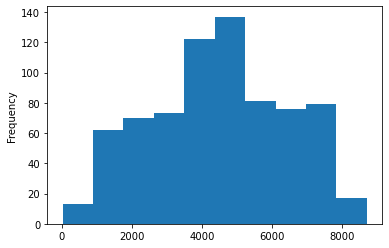

In [9]:
#Peeking into how target variable is distributed
data1.cnt.plot(kind='hist')

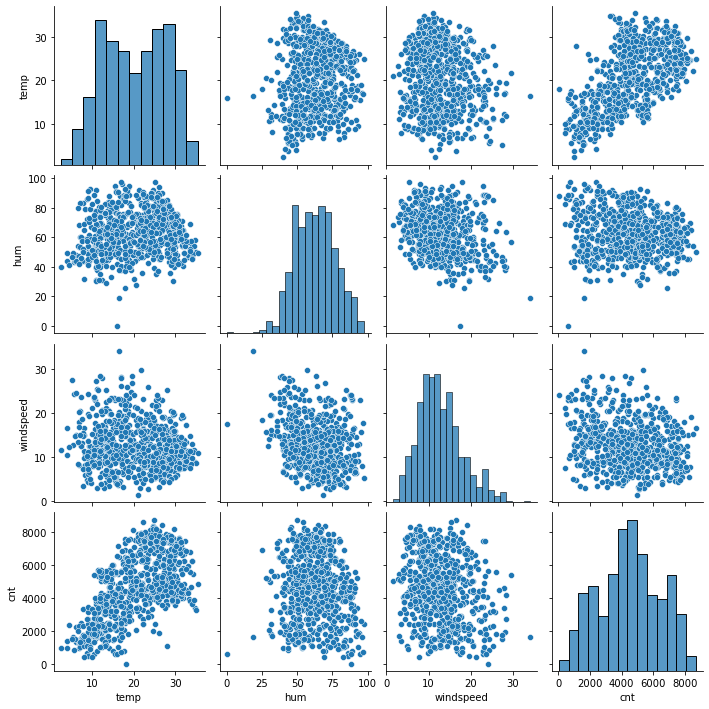

In [10]:
#Start looking at visualizations between continuous variables
sns.pairplot(data1[['temp','hum','windspeed','cnt']])
plt.show()

##### <i>There are variables like temp which show linear associations wrt cnt, this shows that Linear Regression is possible and linear relationships might exist, this solves for assumption 1c, surprisingly temp, hum and windspeed dont exhibhit any relation amongst them</i>

<AxesSubplot:>

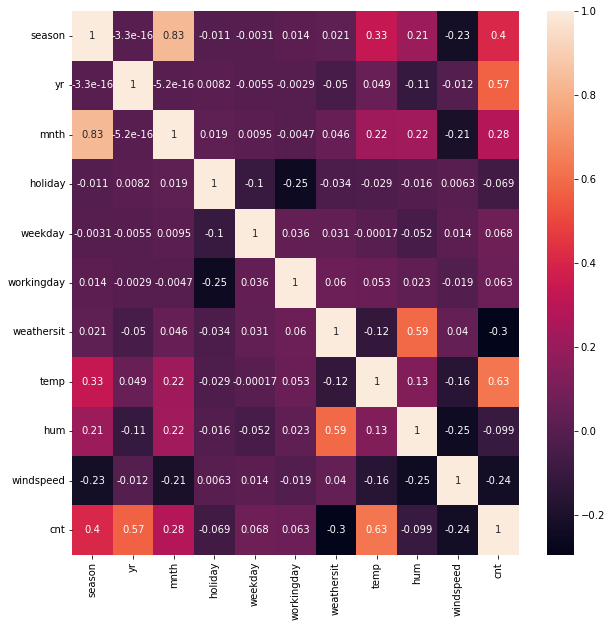

In [11]:
#The above Pairplot does not attach a numerical value with the association, hence plotting the correlation matrix below
cor = data1.corr()
cor
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, annot=True)

Becuase a lot of these variables are categorical represented in the numerical format cannot really make a lot of sense with these values

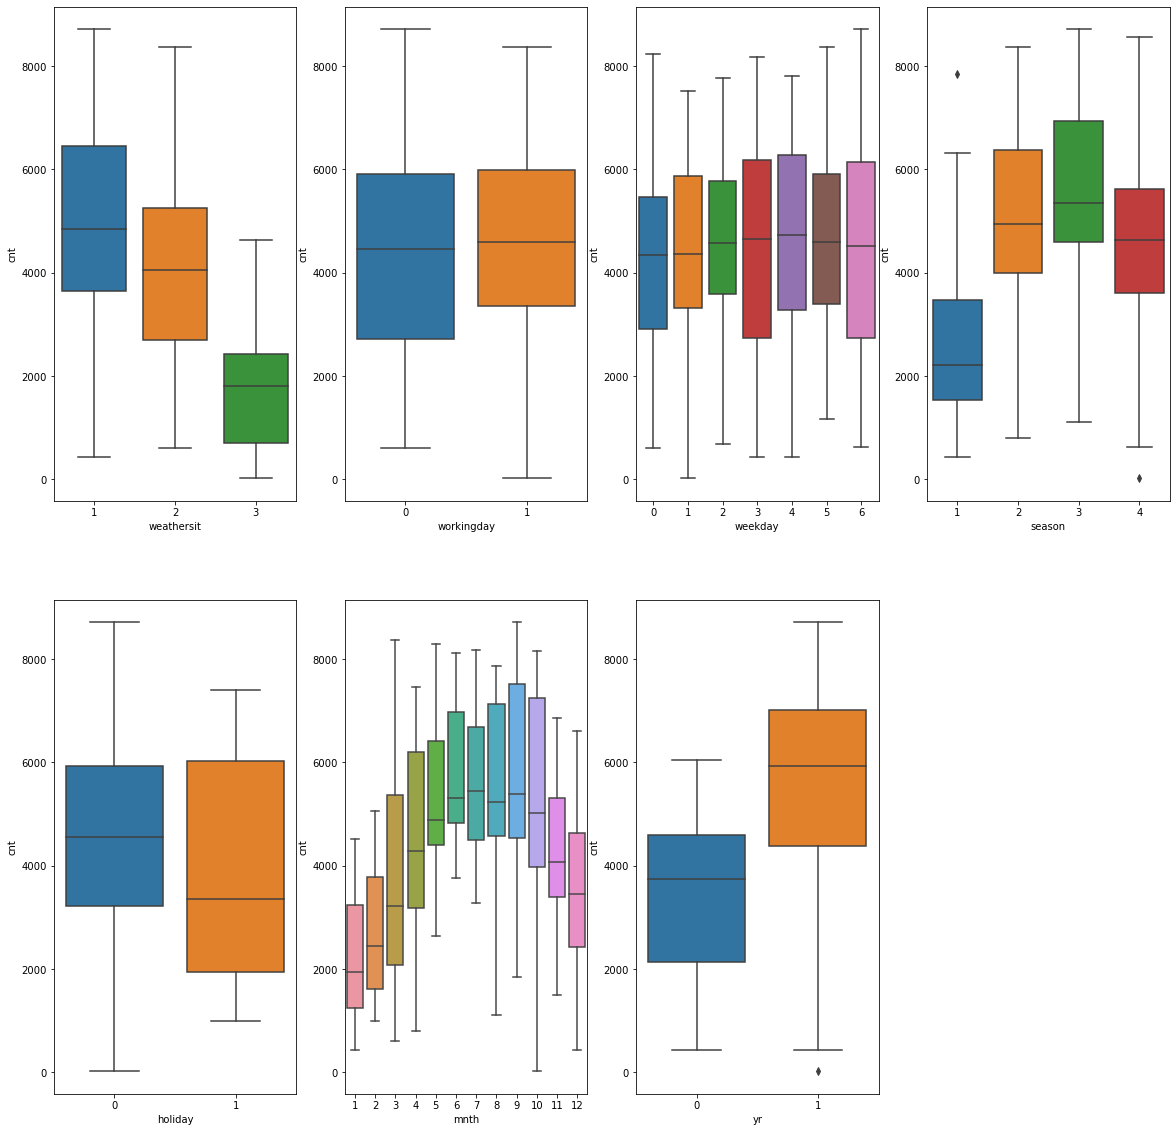

In [12]:
#Compare Medians and qualitatively compare between the classes in a variable
plt.figure(figsize=(20, 20))
plt.subplot(2,4,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data1)
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = data1)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data1)
plt.subplot(2,4,4)
sns.boxplot(x = 'season', y = 'cnt', data = data1)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data1)
plt.subplot(2,4,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = data1)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data1)
plt.show()

##### We do observe that, there is some difference in the median values of the cnt variable across the categorical variables
We can go ahead with Mulitple Linear Regression

### Data Preparation
Few categorical variables in our data needs encoding

In [13]:
# There are few variables that need encoding : weathersit, weekday, season, mnth
df = data1
df['mnth'] = df['mnth'].map({1: 'm1', 2: 'm2', 3: 'm3', 4: 'm4', 5: 'm5', 6: 'm6', 7: 'm7', 8: 'm8', 9: 'm9', 10: 'm10', 11: 'm11', 12: 'm12'})
df['weekday'] = df['weekday'].map({0: 'd0', 1: 'd1', 2: 'd2', 3: 'd3', 4: 'd4', 5: 'd5', 6: 'd6'})  
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,m1,0,d6,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,m1,0,d0,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,m1,0,d1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,m1,0,d2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,m1,0,d3,1,clear,9.305237,43.6957,12.522300,1600


In [14]:
# Let's drop the first column from status df using 'drop_first = True'
df_trans = pd.get_dummies(df, columns = ['mnth','season','weekday','weathersit'], drop_first = True)

In [15]:
#Final Dataframe with encoding
df_trans.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_m10,mnth_m11,mnth_m12,...,season_summer,season_winter,weekday_d1,weekday_d2,weekday_d3,weekday_d4,weekday_d5,weekday_d6,weathersit_mist,weathersit_snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Train and Test Splitting

In [105]:
#Post encoding the dataset, we shall now split the data into Train & Test using a standard split of 70:30
np.random.seed(0)
df_train, df_test = train_test_split(df_trans, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
We can use the Min-Max scaling method for our numerical variables to have all variables at similar scales, so that our interpretations on the model makes sense

In [17]:
#Initializing the scaler
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all numerical columns
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_m10,mnth_m11,mnth_m12,...,season_summer,season_winter,weekday_d1,weekday_d2,weekday_d3,weekday_d4,weekday_d5,weekday_d6,weathersit_mist,weathersit_snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,1,0,0,...,0,1,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [20]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_m10,mnth_m11,mnth_m12,...,season_summer,season_winter,weekday_d1,weekday_d2,weekday_d3,weekday_d4,weekday_d5,weekday_d6,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.086275,0.086275,0.084314,...,0.245098,0.24902,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.281045,0.281045,0.278131,...,0.430568,0.43287,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We see all the numrical values being between 0 and 1, they have been scaled 

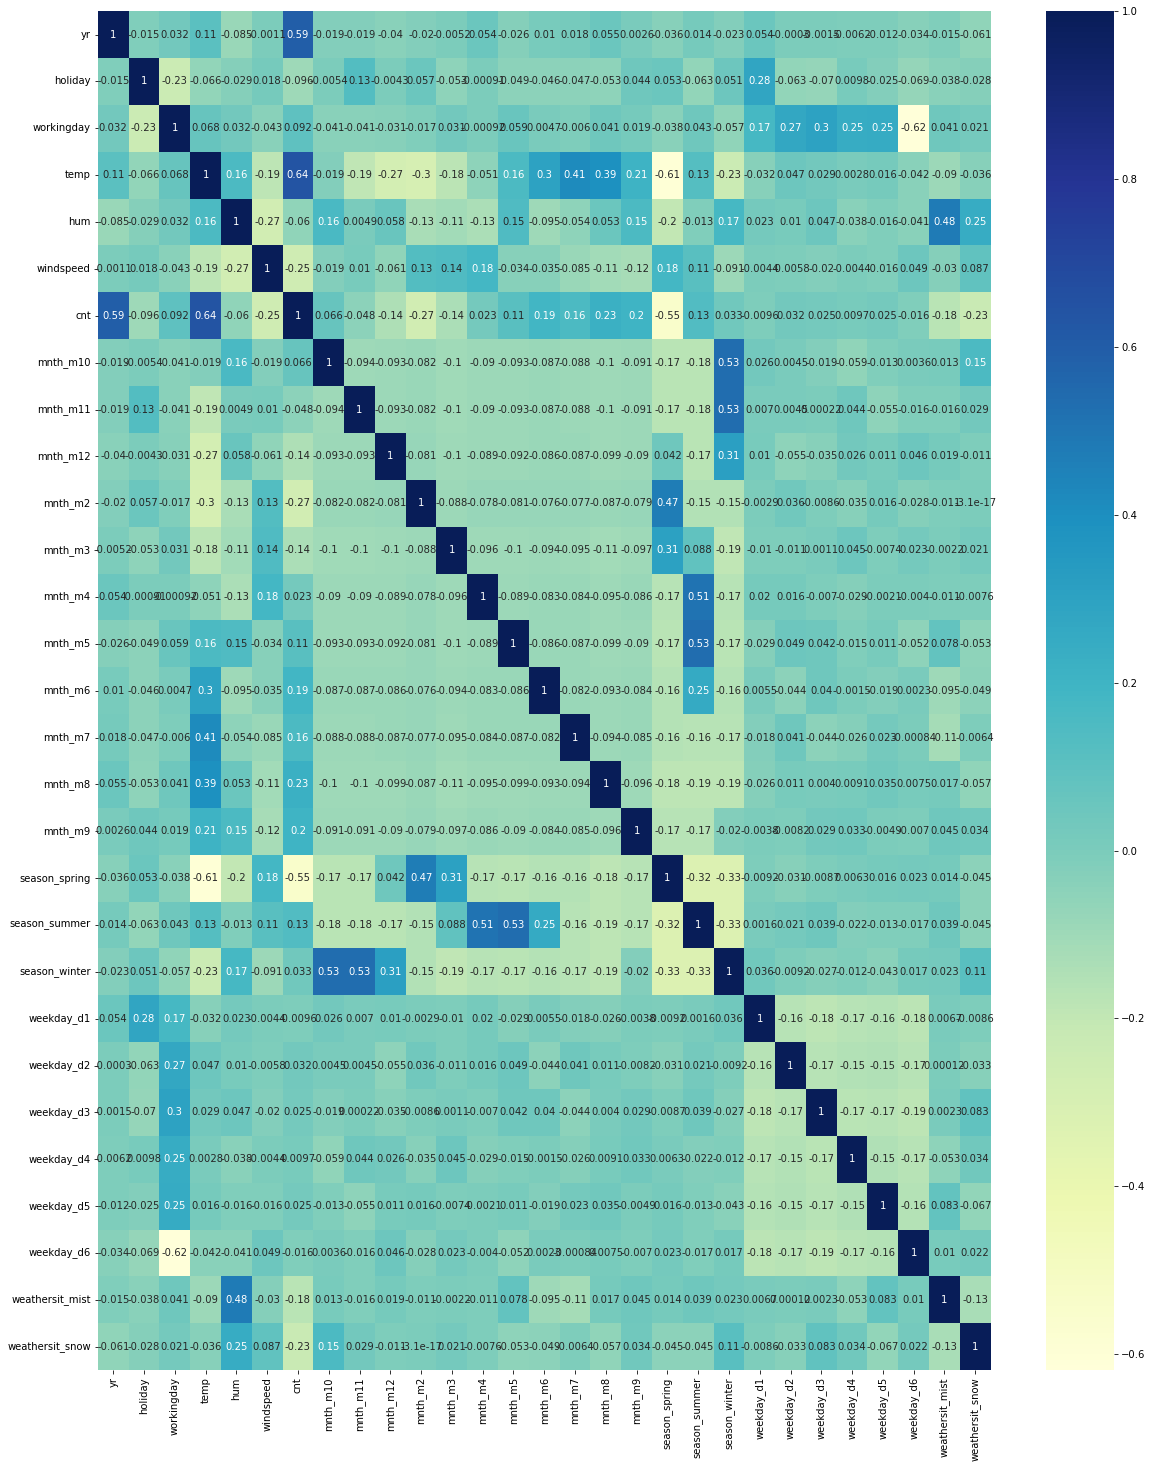

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We do notice correlations, and hence should be modeled carefully to avoid the concept of multi collinearity

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a Linear Model (Manually, building the model with all the variables and eliminating them 1 by 1)
We see that there are 29 variables at hand and as per industry standards for variables <= 30, we can build the model manually

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
# running RFE with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Listing down the columns and its rank according to RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#Lets now see all the features approved by RFE
col = X_train.columns[rfe.support_]
col

A lot of these variables actually make sense basis business conventions too,
1. YoY business is increasing
2. It matters a lot if its a Holiday or not
3. Temperature, humidity, windspeed matters a lot too, weather conditions impact a lot on people's travel decision making

In [ ]:
#Lets now see the columns that weren't approved by RFE
X_train.columns[~rfe.support_]

In [ ]:
#Building the model using the stats model package for detailed statistics about the model
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable as the stats model does not add it by itself
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [24]:
# Adding a constant variable as the stats model does not add it by itself
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [25]:
# Fitting the linear model
lm = sm.OLS(y_train,X_train).fit()

In [26]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.74e-182
Time:                        09:19:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2242      0.043     

In [28]:
#Checking VIF values for the model with its respective variables
X_train_new = X_train.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weekday_d4,inf
24,weekday_d5,inf
2,workingday,inf
22,weekday_d3,inf
21,weekday_d2,inf
20,weekday_d1,inf
1,holiday,inf
3,temp,46.36
4,hum,32.75
19,season_winter,10.34


#### As we observe weekday_d4 has a higher VIF and p_value, hence dropping the variable from the model (From now on dropping one variable at a time to see how we arrive at the perfect model

In [29]:
X_train_n1 = X_train.drop(['weekday_d4'],axis=1)

In [30]:
# Running the linear model again
lm1 = sm.OLS(y_train,X_train_n1).fit()

In [31]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.74e-182
Time:                        09:22:43   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2242      0.043     

In [32]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n1.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.36
4,hum,32.75
19,season_winter,10.34
2,workingday,9.59
18,season_summer,8.91
15,mnth_m8,8.45
14,mnth_m7,7.57
17,season_spring,7.25
12,mnth_m5,6.74
13,mnth_m6,6.45


#### We have to drop the variable weekday_d3 because of its highest P-value in the model, hence dropping this variable in the next model iteration

In [33]:
X_train_n2 = X_train_n1.drop(['weekday_d3'],axis=1)

In [34]:
# Running the linear model again
lm2 = sm.OLS(y_train,X_train_n2).fit()

In [35]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.61e-183
Time:                        09:29:23   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2237      0.042     

In [36]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n2.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.34
4,hum,32.75
19,season_winter,10.33
18,season_summer,8.91
15,mnth_m8,8.45
14,mnth_m7,7.57
17,season_spring,7.25
2,workingday,6.84
12,mnth_m5,6.74
13,mnth_m6,6.45


#### We observe a high p value and VIF for the month7 variable, hence dropping that in the next iteration

In [37]:
X_train_n3 = X_train_n2.drop(['mnth_m7'],axis=1)

In [38]:
# Running the linear model again
lm3 = sm.OLS(y_train,X_train_n3).fit()

In [39]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.17e-184
Time:                        09:31:32   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2339      0.038     

In [40]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n3.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,32.24
3,temp,20.13
18,season_winter,9.95
17,season_summer,8.63
2,workingday,6.83
16,season_spring,5.91
5,windspeed,5.12
7,mnth_m11,4.42
6,mnth_m10,4.40
12,mnth_m5,3.86


#### We observe a high p value and VIF for the month 11 variable, hence dropping that in the next iteration

In [41]:
X_train_n4 = X_train_n3.drop(['mnth_m11'],axis=1)

In [42]:
# Running the linear model again
lm4 = sm.OLS(y_train,X_train_n4).fit()

In [44]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.19e-185
Time:                        09:33:20   Log-Likelihood:                 527.68
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2362      0.037     

In [45]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n4.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.56
3,temp,20.04
16,season_summer,8.63
2,workingday,6.80
15,season_spring,5.91
5,windspeed,4.98
17,season_winter,4.86
11,mnth_m5,3.82
10,mnth_m4,3.47
12,mnth_m6,2.52


#### Now the p-values for month12 is high and hence dropping it in the next iteration

In [46]:
X_train_n5 = X_train_n4.drop(['mnth_m12'],axis=1)

In [47]:
# Running the linear model again
lm5 = sm.OLS(y_train,X_train_n5).fit()

In [48]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.38e-186
Time:                        09:38:18   Log-Likelihood:                 527.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2366      0.037     

In [49]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n5.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,30.96
3,temp,19.88
15,season_summer,8.63
2,workingday,6.80
14,season_spring,5.88
5,windspeed,4.98
16,season_winter,4.56
10,mnth_m5,3.80
9,mnth_m4,3.46
11,mnth_m6,2.51


#### Now the p-values for weekday_d5 is high and hence dropping it in the next iteration

In [50]:
X_train_n6 = X_train_n5.drop(['weekday_d5'],axis=1)

In [51]:
# Running the linear model again
lm6 = sm.OLS(y_train,X_train_n6).fit()

In [52]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.44e-187
Time:                        09:42:05   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2372      0.037     

In [53]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n6.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,30.94
3,temp,19.86
15,season_summer,8.63
2,workingday,6.03
14,season_spring,5.88
5,windspeed,4.98
16,season_winter,4.56
10,mnth_m5,3.80
9,mnth_m4,3.46
11,mnth_m6,2.51


#### Now the p-values for season_summer is high and the VIF too, hence dropping it in the next iteration

In [54]:
X_train_n7 = X_train_n6.drop(['season_summer'],axis=1)

In [55]:
# Running the linear model again
lm7 = sm.OLS(y_train,X_train_n7).fit()

In [56]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.80e-187
Time:                        09:45:50   Log-Likelihood:                 526.53
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -915.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2537      0.035     

In [57]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n7.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.58
3,temp,17.36
2,workingday,5.95
5,windspeed,4.82
14,season_spring,4.23
15,season_winter,3.97
19,weathersit_mist,2.27
0,yr,2.11
18,weekday_d6,1.98
12,mnth_m8,1.96


#### Now the p-values for weekday_d2 is high, hence dropping it in the next iteration

In [58]:
X_train_n8 = X_train_n7.drop(['weekday_d2'],axis=1)

In [59]:
# Running the linear model again
lm8 = sm.OLS(y_train,X_train_n8).fit()

In [60]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.85e-188
Time:                        09:52:13   Log-Likelihood:                 525.86
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -920.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2550      0.035     

In [61]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n8.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.58
3,temp,17.36
2,workingday,5.57
5,windspeed,4.82
14,season_spring,4.23
15,season_winter,3.97
18,weathersit_mist,2.27
0,yr,2.11
17,weekday_d6,1.98
12,mnth_m8,1.96


#### Now the p-values for weekday_d1 is high, hence dropping it in the next iteration

In [62]:
X_train_n9 = X_train_n8.drop(['weekday_d1'],axis=1)

In [63]:
# Running the linear model again
lm9 = sm.OLS(y_train,X_train_n9).fit()

In [64]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.21e-189
Time:                        09:55:25   Log-Likelihood:                 525.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2551      0.035     

In [65]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n9.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.49
3,temp,17.27
2,workingday,5.32
5,windspeed,4.82
14,season_spring,4.21
15,season_winter,3.97
17,weathersit_mist,2.27
0,yr,2.10
16,weekday_d6,1.98
12,mnth_m8,1.96


#### Now the p-values for month_m2 is high, hence dropping it in the next iteration

In [66]:
X_train_n10 = X_train_n9.drop(['mnth_m2'],axis=1)

In [67]:
# Running the linear model again
lm10 = sm.OLS(y_train,X_train_n10).fit()

In [68]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.05e-189
Time:                        09:58:25   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2590      0.035     

In [69]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n10.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.49
3,temp,17.27
2,workingday,5.32
5,windspeed,4.76
14,season_winter,3.95
13,season_spring,3.79
16,weathersit_mist,2.27
0,yr,2.10
15,weekday_d6,1.98
11,mnth_m8,1.96


#### Dropping the column holiday due to its considerable high p-value

In [82]:
X_train_n11 = X_train_n10.drop(['holiday'],axis=1)

In [83]:
# Running the linear model again
lm11 = sm.OLS(y_train,X_train_n11).fit()

In [84]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.91e-190
Time:                        11:50:23   Log-Likelihood:                 522.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2518      0.035     

In [85]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n11.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.38
2,temp,17.16
1,workingday,4.75
4,windspeed,4.74
13,season_winter,3.91
12,season_spring,3.73
15,weathersit_mist,2.27
0,yr,2.10
10,mnth_m8,1.96
14,weekday_d6,1.85


#### Dropping the column humidity due to its high VIF value

In [86]:
X_train_n12 = X_train_n11.drop(['hum'],axis=1)

In [87]:
# Running the linear model again
lm12 = sm.OLS(y_train,X_train_n12).fit()

In [88]:
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.37e-188
Time:                        11:57:47   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1693      0.029     

In [90]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n12.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.11
3,windspeed,4.73
1,workingday,4.67
12,season_winter,2.54
11,season_spring,2.35
0,yr,2.09
9,mnth_m8,1.94
13,weekday_d6,1.83
8,mnth_m6,1.68
7,mnth_m5,1.63


#### Dropping the column workingday due to its high VIF value and the plot at the start did not reveal a relationship with the cnt variable

In [96]:
X_train_n13 = X_train_n12.drop(['workingday'],axis=1)

In [97]:
# Running the linear model again
lm13 = sm.OLS(y_train,X_train_n13).fit()

In [98]:
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.72e-184
Time:                        12:09:32   Log-Likelihood:                 502.22
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     494   BIC:                            -904.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2108      0.028     

In [99]:
#Checking VIF values for the model with its respective variables again
X_train_new = X_train_n13.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.67
2,windspeed,4.70
11,season_winter,2.34
10,season_spring,2.10
0,yr,2.09
8,mnth_m8,1.93
7,mnth_m6,1.67
3,mnth_m10,1.61
6,mnth_m5,1.60
13,weathersit_mist,1.55


#### Finalizing lm13 to be the good model amongst the models built, in each step we have considered removing variables from a p-value and VIF POV, and also made sure that the Adjusted R Square is not varied across these models while removing a variable

### Residual Analysis of the Train Data

In [100]:
y_train_pred = lm13.predict(X_train_n13)

Text(0.5, 0, 'Errors')

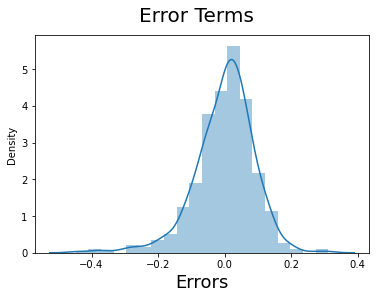

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### <i> Error terms are normally distributed and the mean is 0, this covers assumption 2 </i>

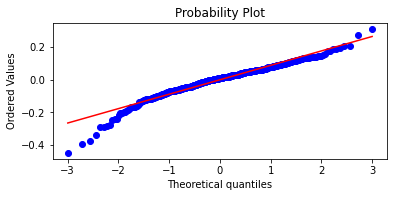

In [102]:
residual = y_train - y_train_pred
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

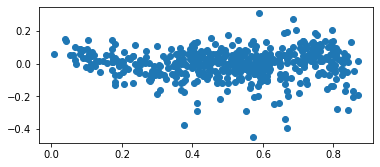

In [103]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_train_pred, residual)

#### <i>We do observe a random pattern when the error term is plotted against the independent variables, meaning its homoskedastic and covers one more important assumption of LR</i>

### Make Predictions

In [106]:
num_vars = ['temp', 'windspeed', 'hum', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [107]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_m10,mnth_m11,mnth_m12,...,season_summer,season_winter,weekday_d1,weekday_d2,weekday_d3,weekday_d4,weekday_d5,weekday_d6,weathersit_mist,weathersit_snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,1.897202,0.129842,0.520592,0.082192,0.073059,0.086758,...,0.264840,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.463866,0.051368,0.218435,0.275286,0.260830,0.282125,...,0.442259,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.724590,0.015460,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,1.550821,0.092963,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,1.863665,0.125381,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,2.225453,0.158650,0.672745,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,3.029478,0.288534,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
y_test = df_test.pop('cnt')
X_test = df_test

In [110]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [112]:
X_test_lm = X_test_lm[X_train_n13.columns]

In [114]:
# Making predictions using the fourth model
y_pred_test = lm13.predict(X_test_lm)

### Model Validation

Text(0, 0.5, 'y_pred')

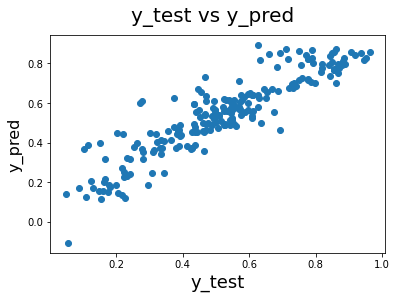

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

Coefficient of determination: 0.81
